(dyn_stack)=
```{raw} html
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# Stackelberg Plans

```{contents} Contents
:depth: 2
```

In addition to what's in Anaconda, this lecture will need the following libraries:

In [1]:
!pip install --upgrade quantecon

Requirement already up-to-date: quantecon in /Users/matthewmckay/anaconda3/envs/quantecon/lib/python3.8/site-packages (0.4.8)


## Overview

This notebook formulates and computes a plan that a **Stackelberg
leader** uses to manipulate forward-looking decisions of a **Stackelberg
follower** that depend on continuation sequences of decisions made once
and for all by the Stackelberg leader at time $0$.

To facilitate computation and interpretation, we formulate things in a
context that allows us to apply dynamic programming for linear-quadratic models.

From the beginning, we carry along a linear-quadratic model of duopoly in
which firms face adjustment costs that make them want to forecast
actions of other firms that influence future prices.

Let's start with some standard imports:

In [2]:
import numpy as np
import numpy.linalg as la
import quantecon as qe
from quantecon import LQ
import matplotlib.pyplot as plt
%matplotlib inline

## Duopoly

Time is discrete and is indexed by $t = 0, 1, \ldots$.

Two firms produce a single good whose demand is governed by the linear
inverse demand curve

$$
p_t = a_0 - a_1 (q_{1t}+ q_{2t} )
$$

where $q_{it}$ is output of firm $i$ at time $t$ and
$a_0$ and $a_1$ are both positive.

$q_{10}, q_{20}$ are given numbers that serve as initial
conditions at time $0$.

By incurring a cost of change

$$
\gamma v_{it}^2
$$

where $\gamma > 0$, firm $i$ can change its output according
to

$$
q_{it+1} = q_{it} + v_{it}
$$

Firm $i$'s profits at time $t$ equal

$$
\pi_{it} = p_t q_{it} - \gamma v_{it}^2
$$

Firm $i$ wants to maximize the present value of its profits

$$
\sum_{t=0}^\infty \beta^t \pi_{it}
$$

where $\beta \in (0,1)$ is a time discount factor.

### Stackelberg Leader and Follower

Each firm $i=1,2$ chooses a sequence
$\vec q_i \equiv \{q_{it+1}\}_{t=0}^\infty$ once and for all at
time $0$.

We let firm 2 be a **Stackelberg leader** and firm 1 be a **Stackelberg
follower**.

The leader firm 2 goes first and chooses
$\{q_{2t+1}\}_{t=0}^\infty$ once and for all at time $0$.

Knowing that firm 2 has chosen $\{q_{2t+1}\}_{t=0}^\infty$, the
follower firm 1 goes second and chooses
$\{q_{1t+1}\}_{t=0}^\infty$ once and for all at time $0$.

In choosing $\vec q_2$, firm 2 takes into account that firm 1 will
base its choice of $\vec q_1$ on firm 2's choice of
$\vec q_2$.

### Abstract Statement of the Leader's and Follower's Problems

We can express firm 1's problem as

$$
\max_{\vec q_1} \Pi_1(\vec q_1; \vec q_2)
$$

where the appearance behind the semi-colon indicates that
$\vec q_2$ is given.

Firm 1's problem induces the best response mapping

$$
\vec q_1 = B(\vec q_2)
$$

(Here $B$ maps a sequence into a sequence)

The Stackelberg leader's problem is

$$
\max_{\vec q_2} \Pi_2 (B(\vec q_2), \vec q_2)
$$

whose maximizer is a sequence $\vec q_2$ that depends on the
initial conditions $q_{10}, q_{20}$ and the parameters of the
model $a_0, a_1, \gamma$.

This formulation captures key features of the model

- Both firms make once-and-for-all choices at time $0$.
- This is true even though both firms are choosing sequences of
  quantities that are indexed by **time**.
- The Stackelberg leader chooses first **within time** $0$,
  knowing that the Stackelberg follower will choose second **within
  time** $0$.

While our abstract formulation reveals the timing protocol and
equilibrium concept well, it obscures details that must be addressed
when we want to compute and interpret a Stackelberg plan and the
follower's best response to it.

To gain insights about these things, we study them in more detail.

### Firms' Problems

Firm 1 acts as if firm 2's sequence $\{q_{2t+1}\}_{t=0}^\infty$ is
given and beyond its control.

Firm 2 knows that firm 1 chooses second and takes this into account in
choosing $\{q_{2t+1}\}_{t=0}^\infty$.

In the spirit of *working backward*, we study firm 1's problem first,
taking $\{q_{2t+1}\}_{t=0}^\infty$ as given.

We can formulate firm 1's optimum problem in terms of the Lagrangian

$$
L=\sum_{t=0}^{\infty}\beta^{t}\{a_{0}q_{1t}-a_{1}q_{1t}^{2}-a_{1}q_{1t}q_{2t}-\gamma v_{1t}^{2}+\lambda_{t}[q_{1t}+v_{1t}-q_{1t+1}]\}
$$

Firm 1 seeks a maximum with respect to
$\{q_{1t+1}, v_{1t} \}_{t=0}^\infty$ and a minimum with respect to
$\{ \lambda_t\}_{t=0}^\infty$.

We approach this problem using methods described in Ljungqvist and
Sargent RMT5 chapter 2, appendix A and Macroeconomic Theory, 2nd
edition, chapter IX.

First-order conditions for this problem are

$$
\begin{aligned} \frac{\partial L}{\partial q_{1t}} & = a_0 - 2 a_1 q_{1t} - a_1 q_{2t} + \lambda_t - \beta^{-1}
             \lambda_{t-1} = 0 , \quad t \geq 1 \cr
             \frac{\partial L}{\partial v_{1t}} & = -2 \gamma v_{1t} +  \lambda_t = 0 , \quad t \geq 0  \cr \end{aligned}
$$

These first-order conditions and the constraint $q_{1t+1} = q_{1t} + v_{1t}$ can be rearranged to take the form

$$
\begin{aligned} v_{1t} & = \beta v_{1t+1} + \frac{\beta a_0}{2 \gamma} - \frac{\beta a_1}{\gamma} q_{1t+1} -
                      \frac{\beta a_1}{2 \gamma} q_{2t+1} \cr
            q_{t+1} & = q_{1t} + v_{1t} \end{aligned}
$$

We can substitute the second equation into the first equation to obtain

$$
(q_{1t+1} - q_{1t} ) = \beta (q_{1t+2} - q_{1t+1}) + c_0 - c_1 q_{1t+1} - c_2 q_{2t+1}
$$

where
$c_0 = \frac{\beta a_0}{2 \gamma}, c_1 = \frac{\beta a_1}{\gamma}, c_2 = \frac{\beta a_1}{2 \gamma}$.

This equation can in turn be rearranged to become the second-order
difference equation

```{math}
:label: sstack1

q_{1t} + (1+\beta + c_1) q_{1t+1} - \beta q_{1t+2} = c_0 - c_2 q_{2t+1}
```

Equation {eq}`sstack1` is a second-order difference equation in the sequence
$\vec q_1$ whose solution we want.

It satisfies **two boundary conditions:**

- an initial condition that $q_{1,0}$, which is given
- a terminal condition requiring that
  $\lim_{T \rightarrow + \infty} \beta^T q_{1t}^2 < + \infty$

Using the lag operators described in chapter IX of *Macroeconomic
Theory, Second edition (1987)*, difference equation
{eq}`sstack1` can be written as

$$
\beta(1 - \frac{1+\beta + c_1}{\beta} L + \beta^{-1} L^2 ) q_{1t+2} = - c_0 + c_2 q_{2t+1}
$$

The polynomial in the lag operator on the left side can be **factored**
as

```{math}
:label: sstack2

(1 - \frac{1+\beta + c_1}{\beta} L + \beta^{-1} L^2 )  = ( 1 - \delta_1 L ) (1 - \delta_2 L)
```

where $0 < \delta_1 < 1 < \frac{1}{\sqrt{\beta}} < \delta_2$.

Because $\delta_2 > \frac{1}{\sqrt{\beta}}$ the operator
$(1 - \delta_2 L)$ contributes an **unstable** component if solved
**backwards** but a **stable** component if solved **forwards**.

Mechanically, write

$$
(1- \delta_2 L) = -\delta_{2} L (1 - \delta_2^{-1} L^{-1} )
$$

and compute the following inverse operator

$$
\left[-\delta_{2} L (1 - \delta_2^{-1} L^{-1} )\right]^{-1} = - \delta_2 (1 - {\delta_2}^{-1} )^{-1} L^{-1}
$$

Operating on both sides of equation {eq}`sstack2` with
$\beta^{-1}$ times this inverse operator gives the follower's
decision rule for setting $q_{1t+1}$ in the
**feedback-feedforward** form.

```{math}
:label: sstack3

q_{1t+1} = \delta_1 q_{1t} - c_0 \delta_2^{-1} \beta^{-1}  \frac{1}{1 -\delta_2^{-1}}  + c_2 \delta_2^{-1} \beta^{-1} \sum_{j=0}^\infty \delta_2^j q_{2t+j+1} ,  \quad t \geq 0
```

The problem of the Stackelberg leader firm 2 is to choose the sequence
$\{q_{2t+1}\}_{t=0}^\infty$ to maximize its discounted profits

$$
\sum_{t=0}^\infty \beta^t \{ (a_0 -  a_1 (q_{1t} + q_{2t}) ) q_{2t} - \gamma (q_{2t+1} - q_{2t})^2 \}
$$

subject to the sequence of constraints {eq}`sstack3` for $t \geq 0$.

We can put a sequence $\{\theta_t\}_{t=0}^\infty$ of Lagrange
multipliers on the sequence of equations {eq}`sstack3`
and formulate the following Lagrangian for the Stackelberg leader firm
2's problem

```{math}
:label: sstack4

\begin{aligned} \tilde L & = \sum_{t=0}^\infty  \beta^t\{ (a_0 -  a_1 (q_{1t} + q_{2t}) ) q_{2t} - \gamma (q_{2t+1} - q_{2t})^2 \} \cr
 &  + \sum_{t=0}^\infty \beta^t \theta_t \{ \delta_1 q_{1t} -  c_0 \delta_2^{-1} \beta^{-1}  \frac{1}{1 -\delta_2^{-1}} +  c_2 \delta_2^{-1} \beta^{-1}
   \sum_{j=0}^\infty \delta_2^{-j} q_{2t+j+1} - q_{1t+1} \} \end{aligned}
```

subject to initial conditions for $q_{1t}, q_{2t}$ at $t=0$.

**Comments:** We have formulated the Stackelberg problem in a space of
sequences.

The max-min problem associated with Lagrangian
{eq}`sstack4` is unpleasant because the time $t$
component of firm $1$'s payoff function depends on the entire
future of its choices of $\{q_{1t+j}\}_{j=0}^\infty$.

This renders a direct attack on the problem cumbersome.

Therefore, below, we will formulate the Stackelberg leader's problem
recursively.

We'll put our little duopoly model into a broader class of models with
the same conceptual structure.

## The Stackelberg Problem

We formulate a class of linear-quadratic Stackelberg leader-follower
problems of which our duopoly model is an instance.

We use the optimal linear regulator (a.k.a. the linear-quadratic dynamic
programming problem described in [LQ Dynamic Programming
problems](https://python-intro.quantecon.org/lqcontrol.html)) to
represent a Stackelberg leader's problem recursively.

Let $z_t$ be an $n_z \times 1$ vector of **natural
state variables**.

Let $x_t$ be an $n_x \times 1$ vector of endogenous
forward-looking variables that are physically free to jump at $t$.

In our duopoly example $x_t = v_{1t}$, the time $t$ decision
of the Stackelberg **follower**.

Let $u_t$ be a vector of decisions chosen by the Stackelberg leader
at $t$.

The $z_t$ vector is inherited physically from the past.

But $x_t$ is a decision made by the Stackelberg follower at time
$t$ that is the follower's best response to the choice of an
entire sequence of decisions made by the Stackelberg leader at time
$t=0$.

Let

$$
y_t = \begin{bmatrix} z_t \\ x_t \end{bmatrix}
$$

Represent the Stackelberg leader's one-period loss function as

$$
r(y, u)  =  y' R y  + u' Q u
$$

Subject to an initial condition for $z_0$, but not for $x_0$, the
Stackelberg leader wants to maximize

```{math}
:label: maxeq

-\sum_{t=0}^\infty \beta^t r(y_t, u_t)
```

The Stackelberg leader faces the model

```{math}
:label: new2

\begin{bmatrix} I & 0 \\ G_{21} & G_{22} \end{bmatrix}
\begin{bmatrix}    z_{t+1} \\  x_{t+1} \end{bmatrix}
= \begin{bmatrix}  \hat A_{11}  &  \hat A_{12} \\ \hat A_{21} & \hat A_{22}  \end{bmatrix} \begin{bmatrix}  z_t \\ x_t \end{bmatrix} + \hat B u_t
```

We assume that the matrix
$\begin{bmatrix} I & 0 \\ G_{21} & G_{22} \end{bmatrix}$ on the
left side of equation {eq}`new2` is invertible, so that we
can multiply both sides by its inverse to obtain

```{math}
:label: new3

\begin{bmatrix}    z_{t+1} \\  x_{t+1} \end{bmatrix}
= \begin{bmatrix}  A_{11}  &   A_{12} \\ A_{21} &  A_{22}  \end{bmatrix}
\begin{bmatrix}  z_t \\ x_t \end{bmatrix} +  B u_t
```

or

```{math}
:label: constrainteq

y_{t+1} = A y_t + B u_t
```

### Interpretation of the Second Block of Equations

The Stackelberg follower's best response mapping is summarized by the
second block of equations of {eq}`new3`.

In particular, these equations are the first-order conditions of the
Stackelberg follower's optimization problem (i.e., its Euler equations).

These Euler equations summarize the forward-looking aspect of the
follower's behavior and express how its time $t$ decision depends on
the leader's actions at times $s \geq t$.

When combined with a stability condition to be imposed below, the Euler
equations summarize the follower’s best response to the sequence of
actions by the leader.

The Stackelberg leader maximizes {eq}`maxeq` by
choosing sequences $\{u_t, x_t, z_{t+1}\}_{t=0}^{\infty}$
subject to {eq}`constrainteq` and an initial condition for $z_0$.

Note that we have an initial condition for $z_0$ but not for $x_0$.

$x_0$ is among the variables to be chosen at time $0$ by the
Stackelberg leader.

The Stackelberg leader uses its understanding of the responses
restricted by {eq}`constrainteq` to manipulate the follower's
decisions.

### More Mechanical Details

For any vector $a_t$, define $\vec a_t = [a_t,
a_{t+1} \ldots ]$.

Define a feasible set of $(\vec y_1, \vec u_0)$ sequences

$$
\Omega(y_0) = \left\{ (\vec y_1, \vec u_0) :  y_{t+1} = A y_t + B u_t, \forall t \geq 0 \right\}
$$

Please remember that the follower's Euler equation is embedded in the
system of dynamic equations $y_{t+1} = A y_t + B u_t$.

Note that in the definition of $\Omega(y_0)$, $y_0$
is taken as given.

Although it is taken as given in $\Omega(y_0)$,
eventually, the $x_0$ component of $y_0$ will be chosen by the
Stackelberg leader.

### Two Subproblems

Once again we use backward induction.

We express the Stackelberg problem in terms of **two subproblems**.

Subproblem 1 is solved by a **continuation Stackelberg leader** at each
date $t \geq 0$.

Subproblem 2 is solved by the **Stackelberg leader** at $t=0$.

The two subproblems are designed

- to respect the protocol in which the follower chooses
  $\vec q_1$ after seeing $\vec q_2$ chosen by the leader
- to make the leader choose $\vec q_2$ while respecting that
  $\vec q_1$ will be the follower's best response to
  $\vec q_2$
- to represent the leader's problem recursively by artfully choosing
  the state variables confronting and the control variables available
  to the leader

#### Subproblem 1

$$
v(y_0) = \max_{(\vec y_1, \vec u_0) \in \Omega(y_0)} - \sum_{t=0}^\infty \beta^t r(y_t, u_t)
$$

#### Subproblem 2

$$
w(z_0) = \max_{x_0} v(y_0)
$$

Subproblem 1 takes the vector of forward-looking variables $x_0$ as
given.

Subproblem 2 optimizes over $x_0$.

The value function $w(z_0)$ tells the value of the Stackelberg plan
as a function of the vector of natural state variables at time $0$,
$z_0$.

### Two Bellman Equations

We now describe Bellman equations for $v(y)$ and $w(z_0)$.

#### Subproblem 1

The value function $v(y)$ in subproblem 1 satisfies the Bellman
equation

```{math}
:label: bellman-stack

v(y) = \max_{u, y^*}  \left\{ - r(y,u) + \beta v(y^*) \right\}
```

where the maximization is subject to

$$
y^* = A y + B u
$$

and $y^*$ denotes next period’s value.

Substituting $v(y) = - y'P y$ into Bellman equation {eq}`bellman-stack` gives

$$
-y' P y = {\rm max}_{  u, y^*} \left\{ -  y' R y -   u'Q     u - \beta y^{* \prime} P y^* \right\}
$$

which as in lecture [linear regulator](https://python-intro.quantecon.org/lqcontrol.html) gives
rise to the algebraic matrix Riccati equation

$$
P = R + \beta A' P A - \beta^2 A' P   B (  Q  + \beta   B' P   B)^{-1}   B' P A
$$

and the optimal decision rule coefficient vector

$$
F = \beta(   Q + \beta   B' P   B)^{-1}  B' P A
$$

where the optimal decision rule is

$$
u_t = - F y_t
$$

#### Subproblem 2

We find an optimal $x_0$ by equating to zero the gradient of $v(y_0)$
with respect to $x_0$:

$$
-2 P_{21} z_0 - 2 P_{22} x_0 =0,
$$

which implies that

$$
x_0 = - P_{22}^{-1} P_{21} z_0
$$

## Stackelberg Plan

Now let's map our duopoly model into the above setup.

We will formulate a state space system

$$
y_t = \begin{bmatrix} z_t \cr x_t \end{bmatrix}
$$

where in this instance $x_t = v_{1t}$, the time $t$ decision
of the follower firm 1.

### Calculations to Prepare Duopoly Model

Now we'll proceed to cast our duopoly model within the framework of the
more general linear-quadratic structure described above.

That will allow us to compute a Stackelberg plan simply by enlisting a
Riccati equation to solve a linear-quadratic dynamic program.

As emphasized above, firm 1 acts as if firm 2's decisions
$\{q_{2t+1}, v_{2t}\}_{t=0}^\infty$ are given and beyond its
control.

### Firm 1's Problem

We again formulate firm 1's optimum problem in terms of the Lagrangian

$$
L=\sum_{t=0}^{\infty}\beta^{t}\{a_{0}q_{1t}-a_{1}q_{1t}^{2}-a_{1}q_{1t}q_{2t}-\gamma v_{1t}^{2}+\lambda_{t}[q_{1t}+v_{1t}-q_{1t+1}]\}
$$

Firm 1 seeks a maximum with respect to
$\{q_{1t+1}, v_{1t} \}_{t=0}^\infty$ and a minimum with respect to
$\{ \lambda_t\}_{t=0}^\infty$.

First-order conditions for this problem are

$$
\begin{aligned} \frac{\partial L}{\partial q_{1t}} & = a_0 - 2 a_1 q_{1t} - a_1 q_{2t} + \lambda_t - \beta^{-1}
             \lambda_{t-1} = 0 , \quad t \geq 1 \cr
             \frac{\partial L}{\partial v_{1t}} & = -2 \gamma v_{1t} +  \lambda_t = 0 , \quad t \geq 0  \cr \end{aligned}
$$

These first-order order conditions and the constraint $q_{1t+1} =
q_{1t} + v_{1t}$ can be rearranged to take the form

$$
\begin{aligned} v_{1t} & = \beta v_{1t+1} + \frac{\beta a_0}{2 \gamma} - \frac{\beta a_1}{\gamma} q_{1t+1} -
                      \frac{\beta a_1}{2 \gamma} q_{2t+1} \cr
            q_{t+1} & = q_{1t} + v_{1t} \end{aligned}
$$

We use these two equations as components of the following linear system
that confronts a Stackelberg continuation leader at time $t$

$$
\begin{bmatrix}       1 & 0 & 0 & 0 \cr
                       0 & 1 & 0 & 0 \cr
                       0 & 0 & 1 & 0 \cr
       \frac{\beta a_0}{2 \gamma} & - \frac{\beta a_1}{2 \gamma} & -\frac{\beta a_1}{\gamma} & \beta \end{bmatrix}
       \begin{bmatrix} 1 \cr q_{2t+1} \cr q_{1t+1} \cr v_{1t+1} \end{bmatrix}
       = \begin{bmatrix} 1 & 0 & 0 & 0 \cr
                         0 & 1 & 0 & 0 \cr
                          0 & 0 & 1 & 1 \cr
                          0 & 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} 1 \cr q_{2t} \cr q_{1t} \cr v_{1t} \end{bmatrix}
       + \begin{bmatrix} 0 \cr 1 \cr 0 \cr 0 \end{bmatrix} v_{2t}
$$

Time $t$ revenues of firm 2 are
$\pi_{2t} = a_0 q_{2t} - a_1 q_{2t}^2 - a_1 q_{1t} q_{2t}$ which
evidently equal

$$
z_t' R_1 z_t \equiv \begin{bmatrix} 1 \cr q_{2t} \cr q_{1t}  \end{bmatrix}'
   \begin{bmatrix} 0 & \frac{a_0}{2}& 0 \cr
                   \frac{a_0}{2} & -a_1 & -\frac{a_1}{2}\cr
                   0 & -\frac{a_1}{2} & 0 \end{bmatrix}
\begin{bmatrix} 1 \cr q_{2t} \cr q_{1t}  \end{bmatrix}
$$

If we set $Q = \gamma$, then firm 2's period $t$ profits can
then be written

$$
y_t' R y_t - Q v_{2t}^2
$$

where

$$
y_t = \begin{bmatrix} z_t \cr x_t \end{bmatrix}
$$

with $x_t = v_{1t}$ and

$$
R =
\begin{bmatrix} R_1 & 0 \cr 0 & 0 \end{bmatrix}
$$

We'll report results of implementing this code soon.

But first, we want to represent the Stackelberg leader's optimal choices
recursively.

It is important to do this for several reasons:

- properly to interpret a representation of the Stackelberg leader's
  choice as a sequence of history-dependent functions
- to formulate a recursive version of the follower's choice problem

First, let's get a recursive representation of the Stackelberg leader's
choice of $\vec q_2$ for our duopoly model.

## Recursive Representation of Stackelberg Plan

In order to attain an appropriate representation of the Stackelberg
leader's history-dependent plan, we will employ what amounts to a
version of the **Big K, little k** device often used in
macroeconomics by distinguishing $z_t$, which depends partly on
decisions $x_t$ of the followers, from another vector
$\check z_t$, which does not.

We will use $\check z_t$ and its history $\check z^t
= [\check z_t, \check z_{t-1}, \ldots, \check z_0]$ to describe the
sequence of the Stackelberg leader's decisions that the Stackelberg
follower takes as given.

Thus, we let
$\check y_t' = \begin{bmatrix}\check z_t' & \check x_t'\end{bmatrix}$
with initial condition $\check z_0 = z_0$ given.

That we distinguish $\check z_t$ from $z_t$ is part and
parcel of the **Big K, little k** device in this
instance.

We have demonstrated that a Stackelberg plan for
$\{u_t\}_{t=0}^\infty$ has a recursive representation

$$
\begin{aligned} \check x_0 & = - P_{22}^{-1} P_{21} z_0 \cr
            u_t & = - F \check y_t, \quad t \geq 0 \cr
            \check y_{t+1} & = (A - BF) \check y_t, \quad t \geq 0 \end{aligned}
$$

From this representation, we can deduce the sequence of functions
$\sigma = \{\sigma_t(\check z^t)\}_{t=0}^\infty$ that comprise a
Stackelberg plan.

For convenience, let $\check A \equiv A - BF$ and partition
$\check A$ conformably to the partition
$y_t = \begin{bmatrix}\check z_t \cr \check x_t \end{bmatrix}$ as

$$
\begin{bmatrix}\check A_{11} & \check A_{12} \cr \check A_{21} & \check A_{22} \end{bmatrix}
$$

Let $H^0_0 \equiv - P_{22}^{-1} P_{21}$ so that
$\check x_0 = H^0_0 \check z_0$.

Then iterations on $\check y_{t+1} = \check A \check y_t$ starting from initial
condition $\check y_0 = \begin{bmatrix}\check z_0 \cr H^0_0 \check z_0\end{bmatrix}$
imply that for $t \geq 1$

$$
x_t = \sum_{j=1}^t H_j^t \check z_{t-j}
$$

where

$$
\begin{aligned} H^t_1 & = \check A_{21} \cr
            H^t_2 & = \check A_{22} \check A_{21} \cr
           \ \   \vdots \  \  &  \  \ \quad \vdots \cr
           H^t_{t-1} & = \check A_{22}^{t-2} \check A_{21} \cr
            H^t_t & = \check A_{22}^{t-1}(\check A_{21} + \check A_{22} H^0_0 ) \end{aligned}
$$

An optimal decision rule for the Stackelberg's choice of $u_t$ is

$$
u_t  = - F \check y_t \equiv - \begin{bmatrix} F_z & F_x \cr \end{bmatrix}
\begin{bmatrix}\check z_t \cr x_t \cr \end{bmatrix}
$$

or

```{math}
:label: finalrule

u_t  = - F_z \check z_t - F_x \sum_{j=1}^t H^t_j z_{t-j} = \sigma_t(\check z^t)
```

Representation {eq}`finalrule` confirms that whenever
$F_x \neq 0$, the typical situation, the time $t$ component
$\sigma_t$ of a Stackelberg plan is **history-dependent**, meaning
that the Stackelberg leader's choice $u_t$ depends not just on
$\check z_t$ but on components of $\check z^{t-1}$.

### Comments and Interpretations

After all, at the end of the day, it will turn out that because we set
$\check z_0 = z_0$, it will be true that $z_t = \check z_t$
for all $t \geq 0$.

Then why did we distinguish $\check z_t$ from $z_t$?

The answer is that if we want to present to the Stackelberg **follower**
a history-dependent representation of the Stackelberg **leader's**
sequence $\vec q_2$, we must use representation
{eq}`finalrule` cast in terms of the history
$\check z^t$ and **not** a corresponding representation cast in
terms of $z^t$.

### Dynamic Programming and Time Consistency of **follower's** Problem

Given the sequence $\vec q_2$ chosen by the Stackelberg leader in
our duopoly model, it turns out that the Stackelberg **follower's**
problem is recursive in the *natural* state variables that confront a
follower at any time $t \geq 0$.

This means that the follower's plan is time consistent.

To verify these claims, we'll formulate a recursive version of a
follower's problem that builds on our recursive representation of the
Stackelberg leader's plan and our use of the **Big K, little k** idea.

### Recursive Formulation of a Follower’s Problem

We now use what amounts to another “Big $K$, little $k$” trick (see
[rational expectations equilibrium](https://python-intro.quantecon.org/rational_expectations.html))
to formulate a recursive version of a follower’s problem cast in terms
of an ordinary Bellman equation.

Firm 1, the follower, faces $\{q_{2t}\}_{t=0}^\infty$ as
a given quantity sequence chosen by the leader and believes that its
output price at $t$ satisfies

$$
p_t  = a_0 - a_1 ( q_{1t} + q_{2t})  , \quad t \geq 0
$$

Our challenge is to represent $\{q_{2t}\}_{t=0}^\infty$ as
a given sequence.

To do so, recall that under the Stackelberg plan, firm 2 sets output
according to the $q_{2t}$ component of

$$
y_{t+1} = \begin{bmatrix}  1 \cr q_{2t} \cr q_{1t} \cr x_t \end{bmatrix}
$$

which is governed by

$$
y_{t+1} = (A - BF) y_t
$$

To obtain a recursive representation of a $\{q_{2t}\}$ sequence
that is exogenous to firm 1, we define a state $\tilde y_t$

$$
\tilde y_t = \begin{bmatrix}  1 \cr q_{2t} \cr \tilde q_{1t} \cr \tilde x_t \end{bmatrix}
$$

that evolves according to

$$
\tilde y_{t+1} = (A - BF) \tilde y_t
$$

subject to the initial condition $\tilde q_{10} = q_{10}$ and
$\tilde x_0 = x_0$ where $x_0 = - P_{22}^{-1} P_{21}$ as
stated above.

Firm 1's state vector is

$$
X_t = \begin{bmatrix} \tilde y_t \cr q_{1t}  \end{bmatrix}
$$

It follows that the follower firm 1 faces law of motion

```{math}
:label: law-motion

\begin{bmatrix} \tilde y_{t+1} \\
q_{1t+1} \end{bmatrix} = \begin{bmatrix} A - BF & 0 \\
0  & 1 \end{bmatrix}  \begin{bmatrix} \tilde y_{t} \\
q_{1t} \end{bmatrix} + \begin{bmatrix} 0 \cr 1 \end{bmatrix} x_t
```

This specification assures that from the point of the view of a firm 1,
$q_{2t}$ is an exogenous process.

Here

- $\tilde q_{1t}, \tilde x_t$ play the role of **Big K**
- $q_{1t}, x_t$ play the role of **little k**

The time $t$ component of firm 1's objective is

$$
\tilde X_t' \tilde R x_t - x_t^2 \tilde Q = \begin{bmatrix} 1 \cr q_{2t} \cr \tilde q_{1t} \cr \tilde x_t \cr q_{1t} \end{bmatrix}'
 \begin{bmatrix} 0 & 0 & 0 & 0 & \frac{a_0}{2} \cr
                 0 & 0 & 0 & 0 & - \frac{a_1}{2} \cr
                 0 & 0 & 0 & 0 & 0 \cr
                 0 & 0 & 0 & 0 & 0 \cr
                 \frac{a_0}{2} &  -\frac{a_1}{2} & 0 & 0 & - a_1 \end{bmatrix}
 \begin{bmatrix} 1 \cr q_{2t} \cr \tilde q_{1t} \cr \tilde x_t \cr q_{1t} \end{bmatrix} - \gamma
    x_t^2
$$

Firm 1's optimal decision rule is

$$
x_t = - \tilde F X_t
$$

and it's state evolves according to

$$
\tilde X_{t+1} = (\tilde A - \tilde B \tilde F) X_t
$$

under its optimal decision rule.

Later we shall compute $\tilde F$ and verify that when we set

$$
X_0 = \begin{bmatrix} 1 \cr q_{20} \cr  q_{10} \cr  x_0 \cr q_{10} \end{bmatrix}
$$

we recover

$$
x_0 = - \tilde F \tilde X_0
$$

which will verify that we have properly set up a recursive
representation of the follower's problem facing the Stackelberg leader's
$\vec q_2$.

### Time Consistency of Follower's Plan

Since the follower can solve its problem using dynamic programming its
problem is recursive in what for it are the **natural state variables**,
namely

$$
\begin{bmatrix} 1 \cr q_{2t} \cr \tilde q_{10} \cr \tilde x_0   \end{bmatrix}
$$

It follows that the follower's plan is time consistent.

## Computing the Stackelberg Plan

Here is our code to compute a Stackelberg plan via a linear-quadratic
dynamic program as outlined above

In [3]:
# Parameters
a0 = 10
a1 = 2
β = 0.96
γ = 120
n = 300
tol0 = 1e-8
tol1 = 1e-16
tol2 = 1e-2

βs = np.ones(n)
βs[1:] = β
βs = βs.cumprod()

In [4]:
# In LQ form
Alhs = np.eye(4)

# Euler equation coefficients
Alhs[3, :] = β * a0 / (2 * γ), -β * a1 / (2 * γ), -β * a1 / γ, β

Arhs = np.eye(4)
Arhs[2, 3] = 1

Alhsinv = la.inv(Alhs)

A = Alhsinv @ Arhs

B = Alhsinv @ np.array([[0, 1, 0, 0]]).T

R = np.array([[0,      -a0 / 2,      0, 0],
              [-a0 / 2,     a1, a1 / 2, 0],
              [0,       a1 / 2,      0, 0],
              [0,            0,      0, 0]])

Q = np.array([[γ]])

# Solve using QE's LQ class
# LQ solves minimization problems which is why the sign of R and Q was changed
lq = LQ(Q, R, A, B, beta=β)
P, F, d = lq.stationary_values(method='doubling')

P22 = P[3:, 3:]
P21 = P[3:, :3]
P22inv = la.inv(P22)
H_0_0 = -P22inv @ P21

# Simulate forward

π_leader = np.zeros(n)

z0 = np.array([[1, 1, 1]]).T
x0 = H_0_0 @ z0
y0 = np.vstack((z0, x0))

yt, ut = lq.compute_sequence(y0, ts_length=n)[:2]

π_matrix = (R + F. T @ Q @ F)

for t in range(n):
    π_leader[t] = -(yt[:, t].T @ π_matrix @ yt[:, t])

# Display policies
print("Computed policy for Stackelberg leader\n")
print(f"F = {F}")

Computed policy for Stackelberg leader

F = [[-1.58004454  0.29461313  0.67480938  6.53970594]]


### Implied Time Series for Price and Quantities

The following code plots the price and quantities

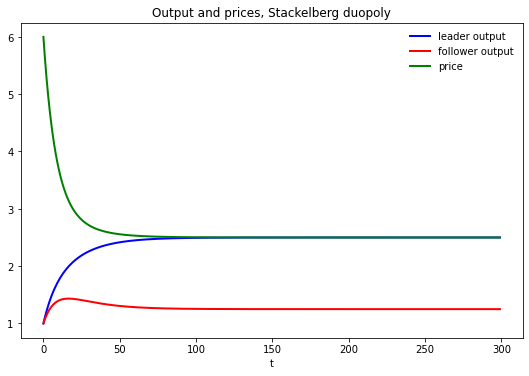

In [5]:
q_leader = yt[1, :-1]
q_follower = yt[2, :-1]
q = q_leader + q_follower       # Total output, Stackelberg
p = a0 - a1 * q                 # Price, Stackelberg

fig, ax = plt.subplots(figsize=(9, 5.8))
ax.plot(range(n), q_leader, 'b-', lw=2, label='leader output')
ax.plot(range(n), q_follower, 'r-', lw=2, label='follower output')
ax.plot(range(n), p, 'g-', lw=2, label='price')
ax.set_title('Output and prices, Stackelberg duopoly')
ax.legend(frameon=False)
ax.set_xlabel('t')
plt.show()

### Value of Stackelberg Leader

We'll compute the present value earned by the Stackelberg leader.

We'll compute it two ways (they give identical answers -- just a check
on coding and thinking)

In [6]:
v_leader_forward = np.sum(βs * π_leader)
v_leader_direct = -yt[:, 0].T @ P @ yt[:, 0]

# Display values
print("Computed values for the Stackelberg leader at t=0:\n")
print(f"v_leader_forward(forward sim) = {v_leader_forward:.4f}")
print(f"v_leader_direct (direct) = {v_leader_direct:.4f}")

Computed values for the Stackelberg leader at t=0:

v_leader_forward(forward sim) = 150.0316
v_leader_direct (direct) = 150.0324


In [7]:
# Manually checks whether P is approximately a fixed point
P_next = (R + F.T @ Q @ F + β * (A - B @ F).T @ P @ (A - B @ F))
(P - P_next < tol0).all()

True

In [8]:
# Manually checks whether two different ways of computing the
# value function give approximately the same answer
v_expanded = -((y0.T @ R @ y0 + ut[:, 0].T @ Q @ ut[:, 0] +
               β * (y0.T @ (A - B @ F).T @ P @ (A - B @ F) @ y0)))
(v_leader_direct - v_expanded < tol0)[0, 0]

True

## Exhibiting Time Inconsistency of Stackelberg Plan

In the code below we compare two values

- the continuation value $- y_t P y_t$ earned by a continuation
  Stackelberg leader who inherits state $y_t$ at $t$
- the value of a **reborn Stackelberg leader** who inherits state
  $z_t$ at $t$ and sets $x_t = - P_{22}^{-1} P_{21}$

The difference between these two values is a tell-tale sign of the time
inconsistency of the Stackelberg plan

In [9]:
# Compute value function over time with a reset at time t
vt_leader = np.zeros(n)
vt_reset_leader = np.empty_like(vt_leader)

yt_reset = yt.copy()
yt_reset[-1, :] = (H_0_0 @ yt[:3, :])

for t in range(n):
    vt_leader[t] = -yt[:, t].T @ P @ yt[:, t]
    vt_reset_leader[t] = -yt_reset[:, t].T @ P @ yt_reset[:, t]

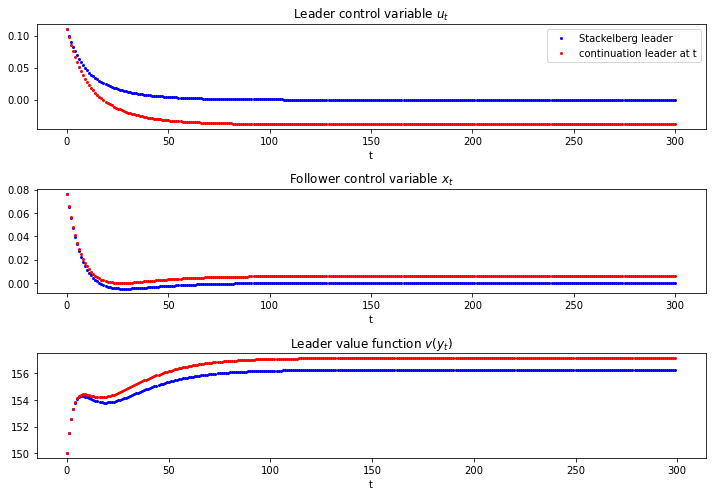

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(10, 7))

axes[0].plot(range(n+1), (- F @ yt).flatten(), 'bo',
    label='Stackelberg leader', ms=2)
axes[0].plot(range(n+1), (- F @ yt_reset).flatten(), 'ro',
    label='continuation leader at t', ms=2)
axes[0].set(title=r'Leader control variable $u_{t}$', xlabel='t')
axes[0].legend()

axes[1].plot(range(n+1), yt[3, :], 'bo', ms=2)
axes[1].plot(range(n+1), yt_reset[3, :], 'ro', ms=2)
axes[1].set(title=r'Follower control variable $x_{t}$', xlabel='t')

axes[2].plot(range(n), vt_leader, 'bo', ms=2)
axes[2].plot(range(n), vt_reset_leader, 'ro', ms=2)
axes[2].set(title=r'Leader value function $v(y_{t})$', xlabel='t')

plt.tight_layout()
plt.show()

## Recursive Formulation of the Follower's Problem

We now formulate and compute the recursive version of the follower's
problem.

We check that the recursive **Big** $K$ **, little** $k$ formulation of the follower's problem produces the same output path
$\vec q_1$ that we computed when we solved the Stackelberg problem

In [11]:
A_tilde = np.eye(5)
A_tilde[:4, :4] = A - B @ F

R_tilde = np.array([[0,            0, 0,    0, -a0 / 2],
                    [0,            0, 0,    0,  a1 / 2],
                    [0,            0, 0,    0,       0],
                    [0,            0, 0,    0,       0],
                    [-a0 / 2, a1 / 2, 0,    0,      a1]])

Q_tilde = Q
B_tilde = np.array([[0, 0, 0, 0, 1]]).T

lq_tilde = LQ(Q_tilde, R_tilde, A_tilde, B_tilde, beta=β)
P_tilde, F_tilde, d_tilde = lq_tilde.stationary_values(method='doubling')

y0_tilde = np.vstack((y0, y0[2]))
yt_tilde = lq_tilde.compute_sequence(y0_tilde, ts_length=n)[0]

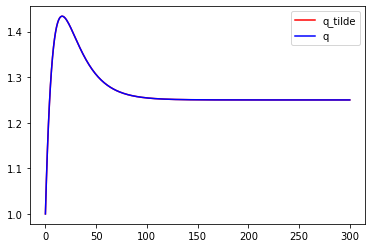

In [12]:
# Checks that the recursive formulation of the follower's problem gives
# the same solution as the original Stackelberg problem
fig, ax = plt.subplots()
ax.plot(yt_tilde[4], 'r', label="q_tilde")
ax.plot(yt_tilde[2], 'b', label="q")
ax.legend()
plt.show()

Note: Variables with `_tilde` are obtained from solving the follower's
problem -- those without are from the Stackelberg problem

In [13]:
# Maximum absolute difference in quantities over time between
# the first and second solution methods
np.max(np.abs(yt_tilde[4] - yt_tilde[2]))

1.7763568394002505e-15

In [14]:
# x0 == x0_tilde
yt[:, 0][-1] - (yt_tilde[:, 1] - yt_tilde[:, 0])[-1] < tol0

True

### Explanation of Alignment

If we inspect the coefficients in the decision rule $- \tilde F$,
we can spot the reason that the follower chooses to set $x_t =
\tilde x_t$ when it sets $x_t = - \tilde F X_t$ in
the recursive formulation of the follower problem.

Can you spot what features of $\tilde F$ imply this?

Hint: remember the components of $X_t$

In [15]:
# Policy function in the follower's problem
F_tilde.round(4)

array([[ 0.    ,  0.    , -0.1032, -1.    ,  0.1032]])

In [16]:
# Value function in the Stackelberg problem
P

array([[  963.54083615,  -194.60534465,  -511.62197962, -5258.22585724],
       [ -194.60534465,    37.3535753 ,    81.97712513,   784.76471234],
       [ -511.62197962,    81.97712513,   247.34333344,  2517.05126111],
       [-5258.22585724,   784.76471234,  2517.05126111, 25556.16504097]])

In [17]:
# Value function in the follower's problem
P_tilde

array([[-1.81991134e+01,  2.58003020e+00,  1.56048755e+01,
         1.51229815e+02, -5.00000000e+00],
       [ 2.58003020e+00, -9.69465925e-01, -5.26007958e+00,
        -5.09764310e+01,  1.00000000e+00],
       [ 1.56048755e+01, -5.26007958e+00, -3.22759027e+01,
        -3.12791908e+02, -1.23823802e+01],
       [ 1.51229815e+02, -5.09764310e+01, -3.12791908e+02,
        -3.03132584e+03, -1.20000000e+02],
       [-5.00000000e+00,  1.00000000e+00, -1.23823802e+01,
        -1.20000000e+02,  1.43823802e+01]])

In [18]:
# Manually check that P is an approximate fixed point
(P  - ((R + F.T @ Q @ F) + β * (A - B @ F).T @ P @ (A - B @ F)) < tol0).all()

True

In [19]:
# Compute `P_guess` using `F_tilde_star`
F_tilde_star = -np.array([[0, 0, 0, 1, 0]])
P_guess = np.zeros((5, 5))

for i in range(1000):
    P_guess = ((R_tilde + F_tilde_star.T @ Q @ F_tilde_star) +
               β * (A_tilde - B_tilde @ F_tilde_star).T @ P_guess
               @ (A_tilde - B_tilde @ F_tilde_star))

In [20]:
# Value function in the follower's problem
-(y0_tilde.T @ P_tilde @ y0_tilde)[0, 0]

112.65590740578095

In [21]:
# Value function with `P_guess`
-(y0_tilde.T @ P_guess @ y0_tilde)[0, 0]

112.65590740578085

In [22]:
# Compute policy using policy iteration algorithm
F_iter = (β * la.inv(Q + β * B_tilde.T @ P_guess @ B_tilde)
          @ B_tilde.T @ P_guess @ A_tilde)

for i in range(100):
    # Compute P_iter
    P_iter = np.zeros((5, 5))
    for j in range(1000):
        P_iter = ((R_tilde + F_iter.T @ Q @ F_iter) + β
                  * (A_tilde - B_tilde @ F_iter).T @ P_iter
                  @ (A_tilde - B_tilde @ F_iter))

    # Update F_iter
    F_iter = (β * la.inv(Q + β * B_tilde.T @ P_iter @ B_tilde)
              @ B_tilde.T @ P_iter @ A_tilde)

dist_vec = (P_iter - ((R_tilde + F_iter.T @ Q @ F_iter)
            + β * (A_tilde - B_tilde @ F_iter).T @ P_iter
            @ (A_tilde - B_tilde @ F_iter)))

if np.max(np.abs(dist_vec)) < 1e-8:
    dist_vec2 = (F_iter - (β * la.inv(Q + β * B_tilde.T @ P_iter @ B_tilde)
                 @ B_tilde.T @ P_iter @ A_tilde))

    if np.max(np.abs(dist_vec2)) < 1e-8:
        F_iter
    else:
        print("The policy didn't converge: try increasing the number of \
            outer loop iterations")
else:
    print("`P_iter` didn't converge: try increasing the number of inner \
        loop iterations")

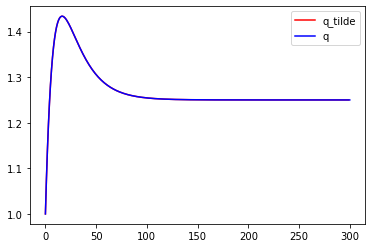

In [23]:
# Simulate the system using `F_tilde_star` and check that it gives the
# same result as the original solution

yt_tilde_star = np.zeros((n, 5))
yt_tilde_star[0, :] = y0_tilde.flatten()

for t in range(n-1):
    yt_tilde_star[t+1, :] = (A_tilde - B_tilde @ F_tilde_star) \
        @ yt_tilde_star[t, :]

fig, ax = plt.subplots()
ax.plot(yt_tilde_star[:, 4], 'r', label="q_tilde")
ax.plot(yt_tilde[2], 'b', label="q")
ax.legend()
plt.show()

In [24]:
# Maximum absolute difference
np.max(np.abs(yt_tilde_star[:, 4] - yt_tilde[2, :-1]))

0.0

## Markov Perfect Equilibrium

The **state** vector is

$$
z_t = \begin{bmatrix} 1 \cr q_{2t} \cr q_{1t} \end{bmatrix}
$$

and the state transition dynamics are

$$
z_{t+1} = A z_t + B_1 v_{1t}  +  B_2 v_{2t}
$$

where $A$ is a $3 \times 3$ identity matrix and

$$
B_1 = \begin{bmatrix} 0 \cr 0 \cr 1 \end{bmatrix} ,
\quad B_2 = \begin{bmatrix} 0 \cr 1 \cr 0 \end{bmatrix}
$$

The Markov perfect decision rules are

$$
v_{1t} = - F_1 z_t , \quad v_{2t} = - F_2 z_t
$$

and in the Markov perfect equilibrium, the state evolves according to

$$
z_{t+1} = (A - B_1 F_1 - B_2 F_2) z_t
$$

In [25]:
# In LQ form
A = np.eye(3)
B1 = np.array([[0], [0], [1]])
B2 = np.array([[0], [1], [0]])

R1 = np.array([[0,            0, -a0 / 2],
               [0,            0,  a1 / 2],
               [-a0 / 2, a1 / 2,      a1]])

R2 = np.array([[0,       -a0 / 2,      0],
               [-a0 / 2,      a1, a1 / 2],
               [0,        a1 / 2,      0]])

Q1 = Q2 = γ
S1 = S2 = W1 = W2 = M1 = M2 = 0.0

# Solve using QE's nnash function
F1, F2, P1, P2 = qe.nnash(A, B1, B2, R1, R2, Q1,
                          Q2, S1, S2, W1, W2, M1,
                          M2, beta=β, tol=tol1)

# Simulate forward
AF = A - B1 @ F1 - B2 @ F2
z = np.empty((3, n))
z[:, 0] = 1, 1, 1
for t in range(n-1):
    z[:, t+1] = AF @ z[:, t]

# Display policies
print("Computed policies for firm 1 and firm 2:\n")
print(f"F1 = {F1}")
print(f"F2 = {F2}")

Computed policies for firm 1 and firm 2:

F1 = [[-0.22701363  0.03129874  0.09447113]]
F2 = [[-0.22701363  0.09447113  0.03129874]]


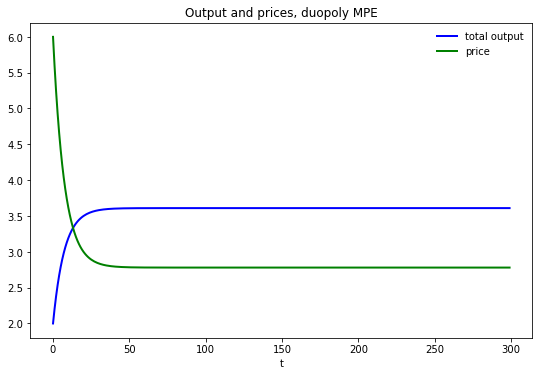

In [26]:
q1 = z[1, :]
q2 = z[2, :]
q = q1 + q2       # Total output, MPE
p = a0 - a1 * q   # Price, MPE

fig, ax = plt.subplots(figsize=(9, 5.8))
ax.plot(range(n), q, 'b-', lw=2, label='total output')
ax.plot(range(n), p, 'g-', lw=2, label='price')
ax.set_title('Output and prices, duopoly MPE')
ax.legend(frameon=False)
ax.set_xlabel('t')
plt.show()

In [27]:
# Computes the maximum difference between the two quantities of the two firms
np.max(np.abs(q1 - q2))

6.8833827526759706e-15

In [28]:
# Compute values
u1 = (- F1 @ z).flatten()
u2 = (- F2 @ z).flatten()

π_1 = p * q1 - γ * (u1) ** 2
π_2 = p * q2 - γ * (u2) ** 2

v1_forward = np.sum(βs * π_1)
v2_forward = np.sum(βs * π_2)

v1_direct = (- z[:, 0].T @ P1 @ z[:, 0])
v2_direct = (- z[:, 0].T @ P2 @ z[:, 0])

# Display values
print("Computed values for firm 1 and firm 2:\n")
print(f"v1(forward sim) = {v1_forward:.4f}; v1 (direct) = {v1_direct:.4f}")
print(f"v2 (forward sim) = {v2_forward:.4f}; v2 (direct) = {v2_direct:.4f}")

Computed values for firm 1 and firm 2:

v1(forward sim) = 133.3303; v1 (direct) = 133.3296
v2 (forward sim) = 133.3303; v2 (direct) = 133.3296


In [29]:
# Sanity check
Λ1 = A - B2 @ F2
lq1 = qe.LQ(Q1, R1, Λ1, B1, beta=β)
P1_ih, F1_ih, d = lq1.stationary_values()

v2_direct_alt = - z[:, 0].T @ lq1.P @ z[:, 0] + lq1.d

(np.abs(v2_direct - v2_direct_alt) < tol2).all()

True

## MPE vs. Stackelberg

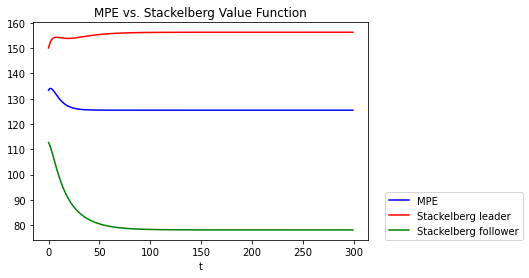

In [30]:
vt_MPE = np.zeros(n)
vt_follower = np.zeros(n)

for t in range(n):
    vt_MPE[t] = -z[:, t].T @ P1 @ z[:, t]
    vt_follower[t] = -yt_tilde[:, t].T @ P_tilde @ yt_tilde[:, t]

fig, ax = plt.subplots()
ax.plot(vt_MPE, 'b', label='MPE')
ax.plot(vt_leader, 'r', label='Stackelberg leader')
ax.plot(vt_follower, 'g', label='Stackelberg follower')
ax.set_title(r'MPE vs. Stackelberg Value Function')
ax.set_xlabel('t')
ax.legend(loc=(1.05, 0))
plt.show()

In [31]:
# Display values
print("Computed values:\n")
print(f"vt_leader(y0) = {vt_leader[0]:.4f}")
print(f"vt_follower(y0) = {vt_follower[0]:.4f}")
print(f"vt_MPE(y0) = {vt_MPE[0]:.4f}")

Computed values:

vt_leader(y0) = 150.0324
vt_follower(y0) = 112.6559
vt_MPE(y0) = 133.3296


In [32]:
# Compute the difference in total value between the Stackelberg and the MPE
vt_leader[0] + vt_follower[0] - 2 * vt_MPE[0]

-3.9709425620912953